In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score, roc_auc_score, accuracy_score, roc_curve
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
base_model = ResNet101(weights='imagenet', include_top=False)

In [3]:
path = 'D:\\Datasets\\orientationDatasetAug\\'
dataset_path = os.listdir('D:\\Datasets\\orientationDatasetAug\\')

# path = 'dataset/'
# dataset_path = os.listdir('dataset')

im_size = 224

features_list = []
labels_list = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '\\' + f)
        img = cv2.resize(img, (im_size, im_size))
        #features = extract_features(data_path + '/' + f)
        img = np.array(img)
        img = img.astype('float32') / 255.0
        img = np.expand_dims(img, axis=0)
        features = base_model.predict(img)  # Extract features from the fc layer
        features = features.flatten()
        features_list.append(features)
        #labels_list.append(i)
        labels_list.append((i, str('dataset_path' + '\\' +i) + '\\' + f))

In [4]:
import pandas as pd 
df = pd.DataFrame(data=labels_list, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

  Labels                     image
0      0    dataset_path\0\0_1.bmp
1      0   dataset_path\0\0_10.bmp
2      0  dataset_path\0\0_100.bmp
3      0  dataset_path\0\0_101.bmp
4      0  dataset_path\0\0_102.bmp
    Labels                      image
955     90  dataset_path\90\90_95.bmp
956     90  dataset_path\90\90_96.bmp
957     90  dataset_path\90\90_97.bmp
958     90  dataset_path\90\90_98.bmp
959     90  dataset_path\90\90_99.bmp


In [5]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
labels_list = y_labelencoder.fit_transform (y)
print (labels_list)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '135' '135' '135' '135'
 '135' '135' '135' '135' '135' '135' '135' '135' '135' '135' '135' '135'
 '135' '135' '135' '135' '135' '135' '135' '135' '135' '135' '135' '135'
 '135' '135' '135' '135' '135' '135' '135' '135' '135' '135' '135' '135'
 '135' '135' '135' '135' '135' '135' '135' '135' '135' '135' '135' '135'
 '135' '135' '135' '135' '135' '135' '135' '135' '135' '135' '135' '135'
 '135' '135' '135' '135' '135' '135' '135' '135' '135' '135' '135' '135'
 '135' '135' '135' '135' '135' '135' '135' '135' '1

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
y = df['Labels'].values

onehot_encoder = OneHotEncoder(sparse=False)
labels_onehot = onehot_encoder.fit_transform(labels_list.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(features_list, labels_list, test_size=0.2, random_state=42)

C:\Users\hkdm4\anaconda3\envs\cuda\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
svm_classifier = SVC(probability=True)  
svm_classifier.fit(X_train, y_train)

y_pred_proba = svm_classifier.predict_proba(X_test)
y_pred = svm_classifier.predict(X_test)

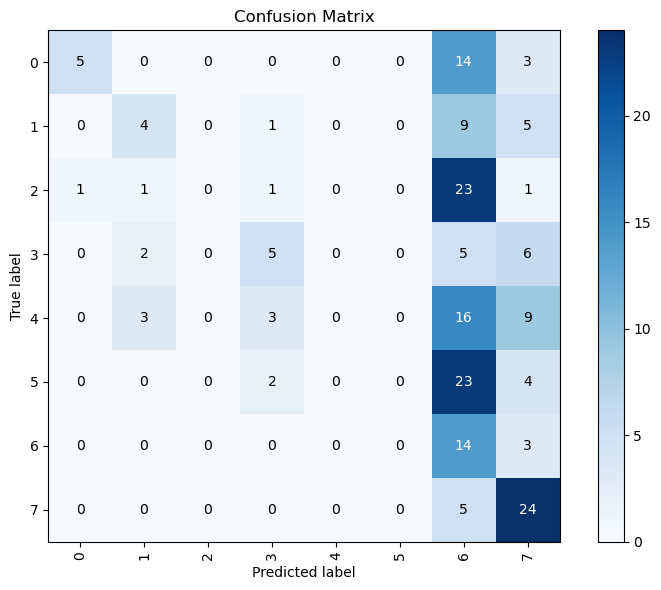

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=90)
plt.yticks(tick_marks, np.unique(y_test))

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("AUC:", auc)

Accuracy: 0.2708333333333333
Precision: 0.2514133595125568
Recall: 0.2708333333333333
F1 Score: 0.20545691935778143
AUC: 0.7784986161626106


C:\Users\hkdm4\anaconda3\envs\cuda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
